In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('adult.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## How does different factor impact the income. 

In [27]:
print(data[data['gender'] == 'Male'].shape)
print(data[data['gender'] == 'Female'].shape)
print(data[data['race'] == 'White'].shape)
print(data[data['race'] == 'Black'].shape)

(32650, 15)
(16192, 15)
(41762, 15)
(4685, 15)


In [12]:
for col in data.columns:
    for val in data[col].unique():
        count = (data[col] == val).sum()
        print(f"Column {col} with value '{val}' appears {count} times")

Column age with value '25' appears 1195 times
Column age with value '38' appears 1264 times
Column age with value '28' appears 1280 times
Column age with value '44' appears 1067 times
Column age with value '18' appears 862 times
Column age with value '34' appears 1303 times
Column age with value '29' appears 1223 times
Column age with value '63' appears 335 times
Column age with value '24' appears 1206 times
Column age with value '55' appears 621 times
Column age with value '65' appears 284 times
Column age with value '36' appears 1348 times
Column age with value '26' appears 1153 times
Column age with value '58' appears 555 times
Column age with value '48' appears 845 times
Column age with value '43' appears 1104 times
Column age with value '20' appears 1113 times
Column age with value '37' appears 1280 times
Column age with value '40' appears 1187 times
Column age with value '72' appears 120 times
Column age with value '45' appears 1096 times
Column age with value '22' appears 1178 t

In [16]:
data['income'].replace(['<=50K', '>50K'], [0,1], inplace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [17]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Text(0, 0.5, 'Frequency')

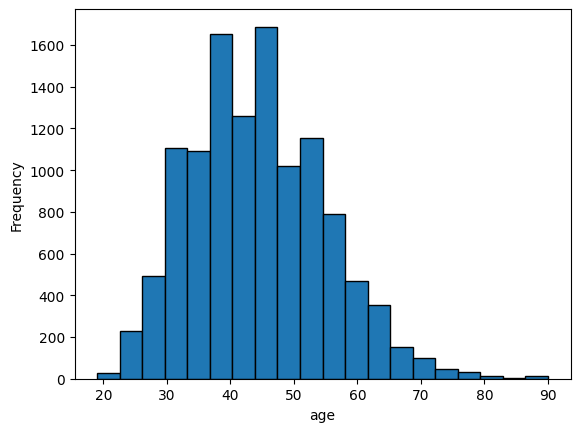

In [19]:
income_greater_50k = data[data['income'] == 1]

plt.hist(income_greater_50k['age'], bins=20, edgecolor='black')
plt.xlabel('age')
plt.ylabel('Frequency')

## Based on the above histogram, we can see that most people at their 30s and 40s have income over 50k. Most people just started their careers at early 20s, and retire at 50s, 60s. 

Text(0.5, 0, 'Race')

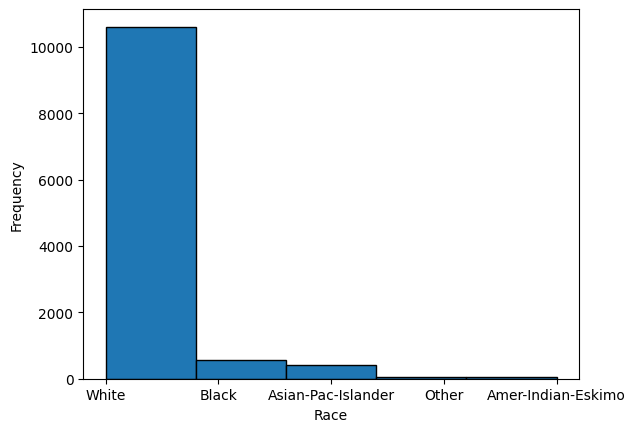

In [ ]:
plt.hist(income_greater_50k['race'], bins=5, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Race')

## Majority of the population that has over 50k income are white, but majority of the data are composed of white population which could be the cause. 

Text(0.5, 0, 'Gender')

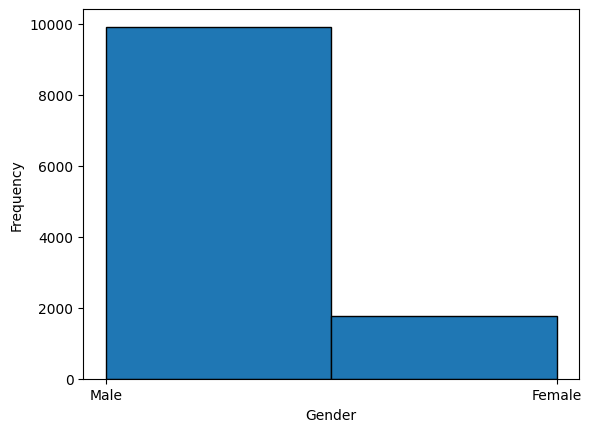

In [20]:
plt.hist(income_greater_50k['gender'], bins=2, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Gender')

## Majority of the males population have income over 50k. About 1/3 of the men are high income, while only about 1/5 of women are high income. 

Text(0.5, 0, 'Occupation')

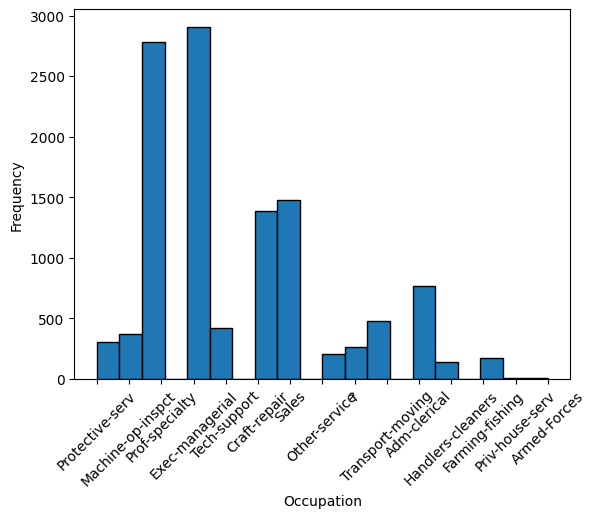

In [ ]:
plt.hist(income_greater_50k['occupation'], bins=20, edgecolor='black')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.xlabel('Occupation')

## Jobs leaning toward technical side have higher pay

Text(0.5, 0, 'Relationship')

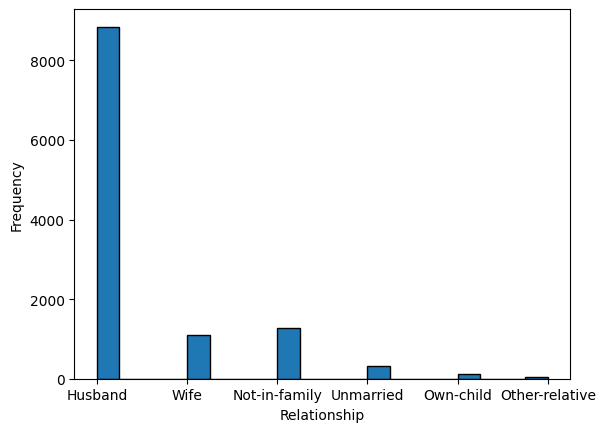

In [ ]:
plt.hist(income_greater_50k['relationship'], bins=20, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Relationship')

## Another evidence that supports males are the high income majority. 

Text(0.5, 0, 'Hours per week')

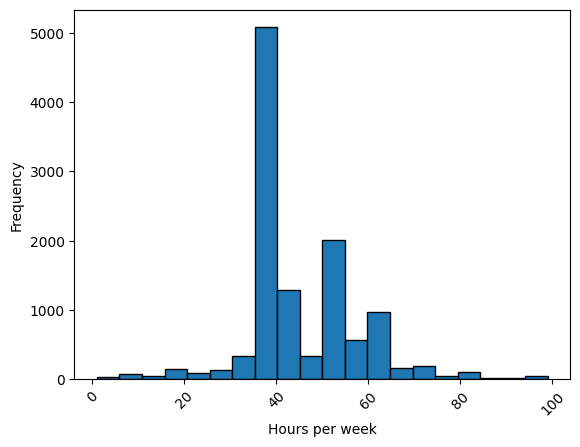

In [ ]:
plt.hist(income_greater_50k['hours-per-week'], bins=20, edgecolor='black')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.xlabel('Hours per week')

## Typical full time 40 hours getting over 50k

Text(0.5, 0, 'Education')

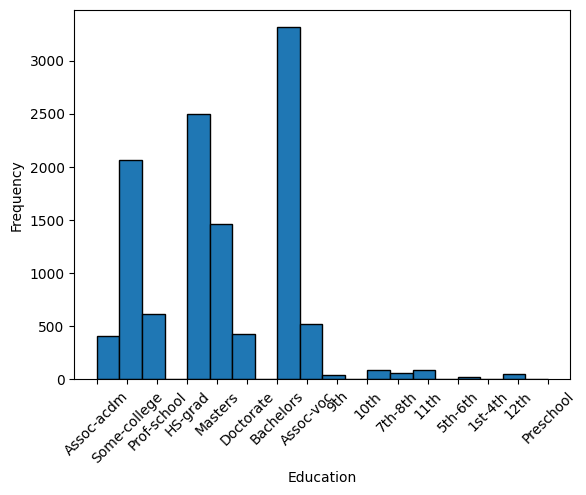

In [ ]:
plt.hist(income_greater_50k['education'], bins=20, edgecolor='black')
plt.xticks(rotation= 45)
plt.ylabel('Frequency')
plt.xlabel('Education')

## Bachelors are the most frequence education that receives over 50k 

Text(0.5, 0, 'Education')

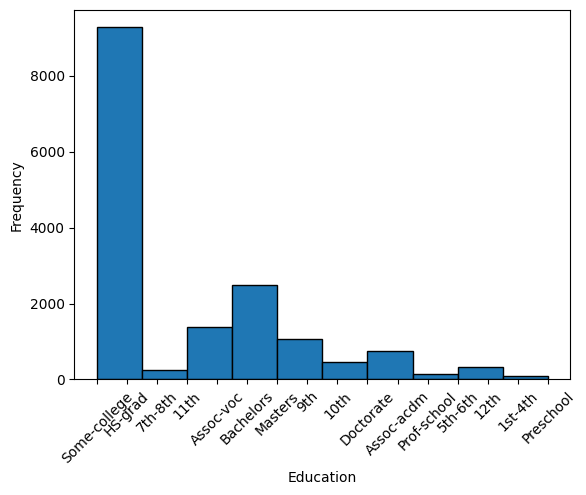

In [ ]:
women = data[data['gender'] == 'Female']
plt.hist(women['education'], edgecolor='black')
plt.xticks(rotation= 45)
plt.ylabel('Frequency')
plt.xlabel('Education')

## About 3/4 of the women did not complete college

Text(0.5, 0, 'Education')

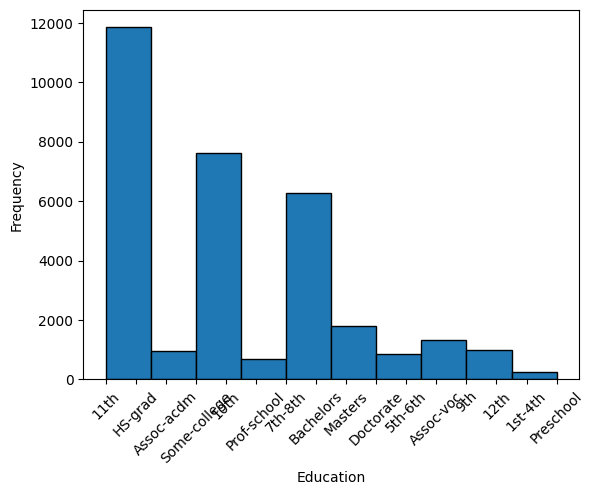

In [28]:
men = data[data['gender'] == 'Male']
plt.hist(men['education'], edgecolor='black')
plt.xticks(rotation= 45)
plt.ylabel('Frequency')
plt.xlabel('Education')

## Majority of the men also did not complete college, but have a higher number of college graduate. 

Text(0.5, 0, 'Relationship')

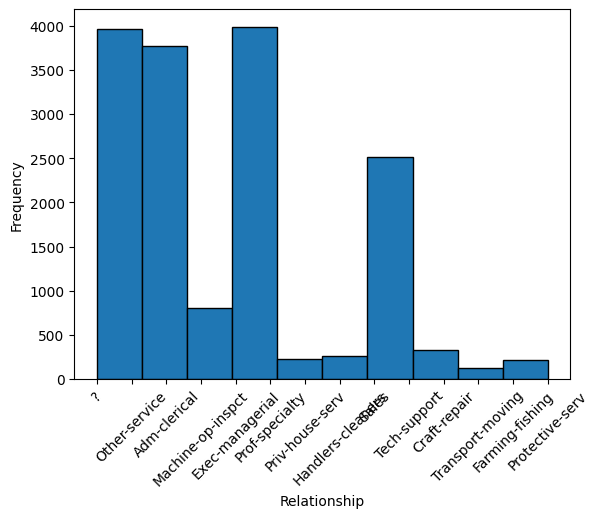

In [ ]:
women = data[data['gender'] == 'Female']
plt.hist(women['occupation'], edgecolor='black')
plt.xticks(rotation= 45)
plt.ylabel('Frequency')
plt.xlabel('Relationship')

Text(0.5, 0, 'Race')

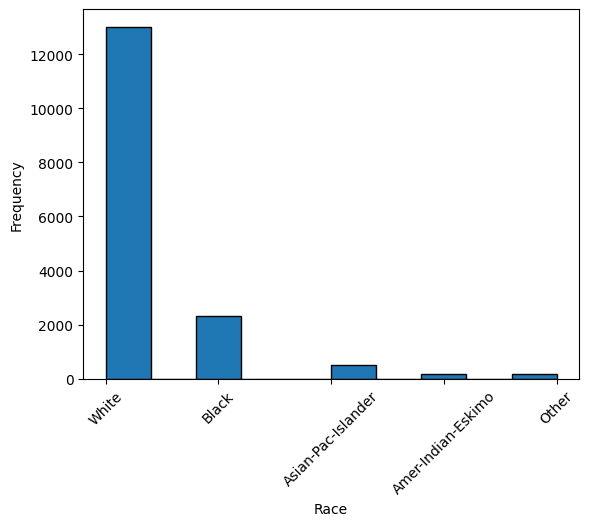

In [ ]:
women = data[data['gender'] == 'Female']
plt.hist(women['race'], edgecolor='black')
plt.xticks(rotation= 45)
plt.ylabel('Frequency')
plt.xlabel('Race')